In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stewdataset/STEW Dataset/sub22_lo.txt
/kaggle/input/stewdataset/STEW Dataset/sub31_hi.txt
/kaggle/input/stewdataset/STEW Dataset/sub18_lo.txt
/kaggle/input/stewdataset/STEW Dataset/sub12_lo.txt
/kaggle/input/stewdataset/STEW Dataset/sub42_hi.txt
/kaggle/input/stewdataset/STEW Dataset/sub47_hi.txt
/kaggle/input/stewdataset/STEW Dataset/sub46_hi.txt
/kaggle/input/stewdataset/STEW Dataset/sub37_lo.txt
/kaggle/input/stewdataset/STEW Dataset/sub29_lo.txt
/kaggle/input/stewdataset/STEW Dataset/sub43_lo.txt
/kaggle/input/stewdataset/STEW Dataset/sub35_hi.txt
/kaggle/input/stewdataset/STEW Dataset/sub12_hi.txt
/kaggle/input/stewdataset/STEW Dataset/sub05_lo.txt
/kaggle/input/stewdataset/STEW Dataset/sub29_hi.txt
/kaggle/input/stewdataset/STEW Dataset/sub11_hi.txt
/kaggle/input/stewdataset/STEW Dataset/sub30_hi.txt
/kaggle/input/stewdataset/STEW Dataset/sub04_lo.txt
/kaggle/input/stewdataset/STEW Dataset/sub28_hi.txt
/kaggle/input/stewdataset/STEW Dataset/ratings.txt
/kaggle/input

In [2]:
import os
import numpy as np
import mne
from scipy import signal

# Path to your dataset folder
data_path = '/kaggle/input/stewdataset/STEW Dataset/'

# List all files in the folder to confirm the naming structure
files = sorted([f for f in os.listdir(data_path) if f.endswith('.npy') or f.endswith('.txt')])
print("Files in the folder:", files)


Files in the folder: ['ratings.txt', 'sub01_hi.txt', 'sub01_lo.txt', 'sub02_hi.txt', 'sub02_lo.txt', 'sub03_hi.txt', 'sub03_lo.txt', 'sub04_hi.txt', 'sub04_lo.txt', 'sub05_hi.txt', 'sub05_lo.txt', 'sub06_hi.txt', 'sub06_lo.txt', 'sub07_hi.txt', 'sub07_lo.txt', 'sub08_hi.txt', 'sub08_lo.txt', 'sub09_hi.txt', 'sub09_lo.txt', 'sub10_hi.txt', 'sub10_lo.txt', 'sub11_hi.txt', 'sub11_lo.txt', 'sub12_hi.txt', 'sub12_lo.txt', 'sub13_hi.txt', 'sub13_lo.txt', 'sub14_hi.txt', 'sub14_lo.txt', 'sub15_hi.txt', 'sub15_lo.txt', 'sub16_hi.txt', 'sub16_lo.txt', 'sub17_hi.txt', 'sub17_lo.txt', 'sub18_hi.txt', 'sub18_lo.txt', 'sub19_hi.txt', 'sub19_lo.txt', 'sub20_hi.txt', 'sub20_lo.txt', 'sub21_hi.txt', 'sub21_lo.txt', 'sub22_hi.txt', 'sub22_lo.txt', 'sub23_hi.txt', 'sub23_lo.txt', 'sub24_hi.txt', 'sub24_lo.txt', 'sub25_hi.txt', 'sub25_lo.txt', 'sub26_hi.txt', 'sub26_lo.txt', 'sub27_hi.txt', 'sub27_lo.txt', 'sub28_hi.txt', 'sub28_lo.txt', 'sub29_hi.txt', 'sub29_lo.txt', 'sub30_hi.txt', 'sub30_lo.txt', 'su

In [3]:
# List all files in the directory
files = os.listdir(data_path)

for file in files:
    if file != 'ratings.txt':  # Skip the ratings file
        # Load the data from the .txt file
        data = np.loadtxt(os.path.join(data_path, file))
        print(f"Loaded {file} with shape: {data.shape}")


Loaded sub22_lo.txt with shape: (19200, 14)
Loaded sub31_hi.txt with shape: (19200, 14)
Loaded sub18_lo.txt with shape: (19200, 14)
Loaded sub12_lo.txt with shape: (19200, 14)
Loaded sub42_hi.txt with shape: (19200, 14)
Loaded sub47_hi.txt with shape: (19200, 14)
Loaded sub46_hi.txt with shape: (19200, 14)
Loaded sub37_lo.txt with shape: (19200, 14)
Loaded sub29_lo.txt with shape: (19200, 14)
Loaded sub43_lo.txt with shape: (19200, 14)
Loaded sub35_hi.txt with shape: (19200, 14)
Loaded sub12_hi.txt with shape: (19200, 14)
Loaded sub05_lo.txt with shape: (19200, 14)
Loaded sub29_hi.txt with shape: (19200, 14)
Loaded sub11_hi.txt with shape: (19200, 14)
Loaded sub30_hi.txt with shape: (19200, 14)
Loaded sub04_lo.txt with shape: (19200, 14)
Loaded sub28_hi.txt with shape: (19200, 14)
Loaded sub04_hi.txt with shape: (19200, 14)
Loaded sub01_hi.txt with shape: (19200, 14)
Loaded sub20_hi.txt with shape: (19200, 14)
Loaded sub10_hi.txt with shape: (19200, 14)
Loaded sub19_hi.txt with shape: 

In [4]:
import shutil

source_dir = "/kaggle/input/stewdataset/STEW Dataset/"

# Destination directory
destination_dir = "/kaggle/working/STEW Dataset/"

shutil.copytree(source_dir, destination_dir)

'/kaggle/working/STEW Dataset/'

In [13]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, Dropout, GRU, Dense


In [8]:
data_dir = '/kaggle/working/STEW Dataset'  # Replace with the actual path to your EEG data
ratings_path = os.path.join(data_dir, 'ratings.txt')


In [14]:
# Filtering parameters
FS = 128         # Sampling frequency (Hz)
LOWCUT = 1.0     # Lower cutoff frequency (Hz)
HIGHCUT = 40.0   # Upper cutoff frequency (Hz)
FILTER_ORDER = 4

def bandpass_filter(data, lowcut=LOWCUT, highcut=HIGHCUT, fs=FS, order=FILTER_ORDER):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    filtered_data = signal.filtfilt(b, a, data, axis=0)
    return filtered_data

def segment_signal(signal_data, epoch_length=FS, overlap=0.5):
    step = int(epoch_length * (1 - overlap))
    segments = []
    for start in range(0, len(signal_data) - epoch_length + 1, step):
        segments.append(signal_data[start:start+epoch_length, :])
    return np.array(segments)


In [15]:
ratings_path = "/kaggle/working/STEW Dataset/ratings.txt"  # update to your path

# Read ratings.txt (assuming comma-separated values)
with open(ratings_path, 'r') as file:
    lines = file.readlines()

ratings_data = [line.strip().split(',') for line in lines if line.strip() != '']
ratings_df = pd.DataFrame(ratings_data, columns=["subject", "rating_lo", "rating_hi"])
ratings_df = ratings_df.astype({'subject': int, 'rating_lo': float, 'rating_hi': float})

# Remove subjects with missing ratings (e.g., subjects 5, 24 and 42)
ratings_df = ratings_df[~ratings_df['subject'].isin([5, 24, 42])]

# Map ratings for SIMKAP (test)
def map_simkap(rating):
    if rating >= 7:
        return 1  # High workload
    elif rating >= 5:
        return 0  # Medium workload
    else:
        return np.nan

# Map ratings for NoTask (rest)
def map_notask(rating):
    if rating <= 3:
        return 0  # Low workload
    elif rating <= 5:
        return 1  # Moderate workload
    else:
        return np.nan

ratings_df['simkap_label'] = ratings_df['rating_hi'].apply(map_simkap)
ratings_df['notask_label'] = ratings_df['rating_lo'].apply(map_notask)
ratings_df = ratings_df.dropna(subset=['simkap_label', 'notask_label'])
print(ratings_df.head())


   subject  rating_lo  rating_hi  simkap_label  notask_label
0        1        2.0        8.0           1.0             0
1        2        1.0        5.0           0.0             0
2        3        1.0        5.0           0.0             0
3        4        2.0        5.0           0.0             0
4        6        4.0        7.0           1.0             1


In [17]:
data_dir = "/kaggle/working/STEW Dataset"  # update to your folder path
eeg_data = {'simkap': {}, 'notask': {}}

for idx, row in ratings_df.iterrows():
    subj = int(row['subject'])  # ✅ convert to integer
    subj_str = f"sub{subj:02d}"  # e.g., sub01, sub23

    # Construct file paths for test (SIMKAP) and rest (NoTask)
    file_simkap = os.path.join(data_dir, f"{subj_str}_hi.txt")
    file_notask = os.path.join(data_dir, f"{subj_str}_lo.txt")

    if os.path.exists(file_simkap):
        simkap_signal = np.loadtxt(file_simkap)
        eeg_data['simkap'][subj] = simkap_signal
    if os.path.exists(file_notask):
        notask_signal = np.loadtxt(file_notask)
        eeg_data['notask'][subj] = notask_signal



In [18]:
for condition in ['simkap', 'notask']:
    for subj, raw_signal in eeg_data[condition].items():
        filtered_signal = bandpass_filter(raw_signal, lowcut=LOWCUT, highcut=HIGHCUT, fs=FS, order=FILTER_ORDER)
        eeg_data[condition][subj] = {
            'raw': raw_signal,
            'filtered': filtered_signal
        }


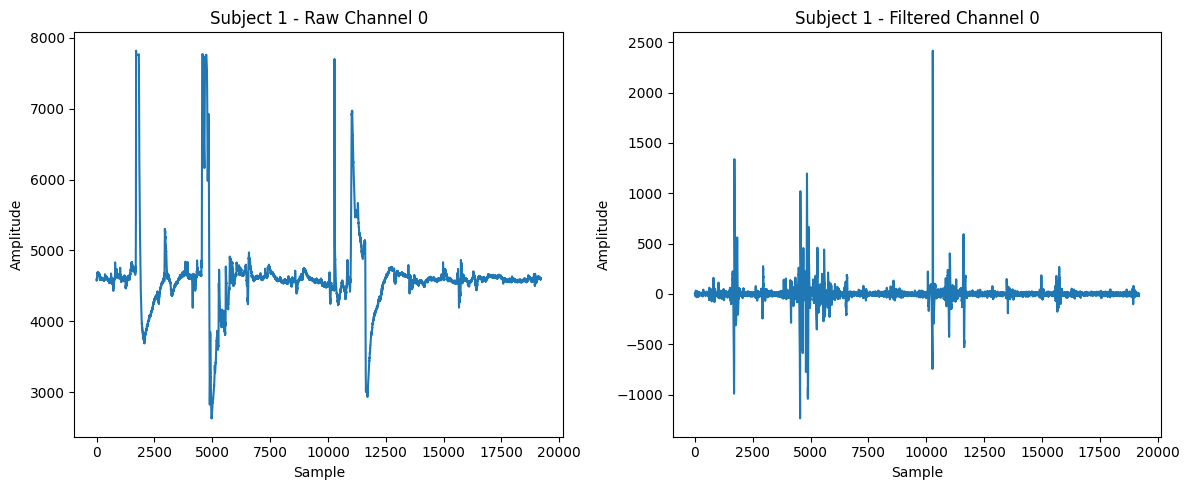

In [19]:
sample_subject = list(eeg_data['simkap'].keys())[0]
sample_channel = 0  # Adjust as needed (e.g., AF3 is the first channel)

raw_signal = eeg_data['simkap'][sample_subject]['raw'][:, sample_channel]
filtered_signal = eeg_data['simkap'][sample_subject]['filtered'][:, sample_channel]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(raw_signal)
plt.title(f"Subject {sample_subject} - Raw Channel {sample_channel}")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.subplot(1,2,2)
plt.plot(filtered_signal)
plt.title(f"Subject {sample_subject} - Filtered Channel {sample_channel}")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


In [20]:
epochs = {'simkap': [], 'notask': []}
labels = {'simkap': [], 'notask': []}

for condition in ['simkap', 'notask']:
    for subj, data_dict in eeg_data[condition].items():
        # Get the corresponding label from the ratings dataframe
        rating_row = ratings_df[ratings_df['subject'] == subj]
        if not rating_row.empty:
            label = int(rating_row['simkap_label'].values[0]) if condition=='simkap' else int(rating_row['notask_label'].values[0])
            segs = segment_signal(data_dict['filtered'], epoch_length=FS, overlap=0.5)
            epochs[condition].append(segs)
            # Repeat the label for each epoch from this subject
            labels[condition] += [label] * segs.shape[0]
    
    # Concatenate epochs across subjects if any data exists for the condition
    if epochs[condition]:
        epochs[condition] = np.concatenate(epochs[condition], axis=0)

print("SIMKAP epochs shape:", epochs['simkap'].shape)
print("NoTask epochs shape:", epochs['notask'].shape)


SIMKAP epochs shape: (12558, 128, 14)
NoTask epochs shape: (12558, 128, 14)


In [21]:
# SIMKAP dataset
X_simkap = epochs['simkap']
y_simkap = np.array(labels['simkap'])

# NoTask dataset
X_notask = epochs['notask']
y_notask = np.array(labels['notask'])

# Split data into training and testing sets (80/20 split)
X_simkap_train, X_simkap_test, y_simkap_train, y_simkap_test = train_test_split(X_simkap, y_simkap, test_size=0.2, random_state=42)
X_notask_train, X_notask_test, y_notask_train, y_notask_test = train_test_split(X_notask, y_notask, test_size=0.2, random_state=42)

print("SIMKAP training shape:", X_simkap_train.shape)
print("NoTask training shape:", X_notask_train.shape)


SIMKAP training shape: (10046, 128, 14)
NoTask training shape: (10046, 128, 14)


In [22]:
def build_cnn_gru_model(input_shape, num_classes):
    model = Sequential()
    # First convolution block
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    # Second convolution block
    model.add(Conv1D(filters=64, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    # GRU layer for temporal dependencies
    model.add(GRU(64, return_sequences=False))
    model.add(Dropout(0.2))
    
    # Output layer (binary classification: 2 classes)
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [23]:
input_shape = X_simkap_train.shape[1:]  # e.g., (128, 14)
num_classes = 2  # Binary classification (Medium vs. High workload)

model_simkap = build_cnn_gru_model(input_shape, num_classes)
model_simkap.summary()

history_simkap = model_simkap.fit(
    X_simkap_train, y_simkap_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_simkap_test, y_simkap_test)
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 128, 32)             │           1,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 128, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 128, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,058 (129.13 KB)

 Trainable params: 32,866 (128.38 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.6162 - loss: 0.6662 - val_accuracy: 0.6708 - val_loss: 0.6164
Epoch 2/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6687 - loss: 0.6211 - val_accuracy: 0.6947 - val_loss: 0.6039
Epoch 3/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6835 - loss: 0.5981 - val_accuracy: 0.6875 - val_loss: 0.6037
Epoch 4/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7095 - loss: 0.5775 - val_accuracy: 0.6911 - val_loss: 0.5971
Epoch 5/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7598 - loss: 0.5117 - val_accuracy: 0.7265 - val_loss: 0.5288
Epoch 6/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7725 - loss: 0.4808 - val_accuracy: 0.7671 - val_loss: 0.4823
Epoch 7/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7842 - loss: 0.4617 - val_accuracy: 0.7564 - val_loss: 0.4838
Epoch 8/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7993 - loss: 0.4511 - val_accu

In [24]:
loss, accuracy = model_simkap.evaluate(X_simkap_test, y_simkap_test)
print("SIMKAP Model Test Accuracy:", accuracy)


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7853 - loss: 0.5360
SIMKAP Model Test Accuracy: 0.7858280539512634


In [25]:
input_shape = X_notask_train.shape[1:]
model_notask = build_cnn_gru_model(input_shape, num_classes)
model_notask.summary()

history_notask = model_notask.fit(
    X_notask_train, y_notask_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_notask_test, y_notask_test)
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 128, 32)             │           1,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 128, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,058 (129.13 KB)

 Trainable params: 32,866 (128.38 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9216 - loss: 0.2816 - val_accuracy: 0.9268 - val_loss: 0.2189
Epoch 2/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9274 - loss: 0.2018 - val_accuracy: 0.9319 - val_loss: 0.1640
Epoch 3/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9415 - loss: 0.1518 - val_accuracy: 0.9590 - val_loss: 0.1331
Epoch 4/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9669 - loss: 0.1074 - val_accuracy: 0.9662 - val_loss: 0.0924
Epoch 5/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9688 - loss: 0.1055 - val_accuracy: 0.9721 - val_loss: 0.0822
Epoch 6/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9703 - loss: 0.0923 - val_accuracy: 0.9785 - val_loss: 0.0704
Epoch 7/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9751 - loss: 0.0777 - val_accuracy: 0.9793 - val_loss: 0.0636
Epoch 8/50
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9778 - loss: 0.0701 - val_accuracy:

# DIFFERENT MODELS FOR BOTH

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, Dropout, GRU, Dense, MaxPooling1D

# Updated SIMKAP model: Tweaked architecture for improved accuracy/val loss
def build_simkap_model(input_shape, num_classes):
    model = Sequential()
    # First Convolution Block
    model.add(Conv1D(64, kernel_size=5, padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    
    # Second Convolution Block
    model.add(Conv1D(128, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))
    
    # Third Convolution Block for richer feature extraction
    model.add(Conv1D(256, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.4))
    
    # GRU layer to capture temporal dependencies
    model.add(GRU(128, return_sequences=False))
    model.add(Dropout(0.4))
    
    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    
    # Output layer for binary classification
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Original NoTask model (unchanged)
def build_notask_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(Conv1D(64, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(GRU(64, return_sequences=False))
    model.add(Dropout(0.2))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model


In [54]:
from tensorflow.keras.callbacks import EarlyStopping

# Define input shape and number of classes for SIMKAP
input_shape_simkap = X_simkap_train.shape[1:]  # e.g., (128, 14)
num_classes = 2  # Binary classification

# Build the updated SIMKAP model
model_simkap = build_simkap_model(input_shape_simkap, num_classes)
model_simkap.summary()

# EarlyStopping callback for SIMKAP
early_stop_simkap = EarlyStopping(monitor='val_loss', 
                                  patience=10, 
                                  restore_best_weights=True, 
                                  verbose=1)

# Train the SIMKAP model with a batch size of 150
history_simkap = model_simkap.fit(
    X_simkap_train, y_simkap_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_simkap_test, y_simkap_test),
    callbacks=[early_stop_simkap]
)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_41 (Conv1D)                   │ (None, 128, 64)             │           4,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 128, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_41 (Activation)           │ (None, 128, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_23 (MaxPooling1D)      │ (None, 64, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 64, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_42 (Conv1D)                   │ (None, 64, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 64, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_42 (Activation)           │ (None, 64, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_24 (MaxPooling1D)      │ (None, 32, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_63 (Dropout)                 │ (None, 32, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_43 (Conv1D)                   │ (None, 32, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 32, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_43 (Activation)           │ (None, 32, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_25 (MaxPooling1D)      │ (None, 16, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_64 (Dropout)                 │ (None, 16, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_16 (GRU)                         │ (None, 128)                 │         148,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_66 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 2)                   │             2

 Total params: 294,594 (1.12 MB)

 Trainable params: 293,698 (1.12 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6095 - loss: 0.6741 - val_accuracy: 0.6895 - val_loss: 0.5874
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6993 - loss: 0.5785 - val_accuracy: 0.7317 - val_loss: 0.5546
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7379 - loss: 0.5268 - val_accuracy: 0.7396 - val_loss: 0.5056
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7535 - loss: 0.5155 - val_accuracy: 0.7345 - val_loss: 0.5090
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7916 - loss: 0.4512 - val_accuracy: 0.7930 - val_loss: 0.4507
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7968 - loss: 0.4449 - val_accuracy: 0.7619 - val_loss: 0.4882
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8148 - loss: 0.4236 - val_accuracy: 0.7643 - val_loss: 0.4857
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8244 - loss: 0.4016 - val_accuracy: 0.7930 - v

In [55]:
loss_simkap, acc_simkap = model_simkap.evaluate(X_simkap_test, y_simkap_test, verbose=1)
print(f"SIMKAP Model Test Accuracy: {acc_simkap:.4f} | Test Loss: {loss_simkap:.4f}")


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8818 - loss: 0.2841
SIMKAP Model Test Accuracy: 0.8798 | Test Loss: 0.2881


In [48]:
early_stop_notask = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

input_shape_notask = X_notask_train.shape[1:]
model_notask = build_notask_model(input_shape_notask, num_classes)
model_notask.summary()

history_notask = model_notask.fit(
    X_notask_train, y_notask_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_notask_test, y_notask_test),
    callbacks=[early_stop_notask]
)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_33 (Conv1D)                   │ (None, 128, 32)             │           1,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 128, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_33 (Activation)           │ (None, 128, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 128, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_34 (Conv1D)                   │ (None, 128, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 128, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_34 (Activation)           │ (None, 128, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 128, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_13 (GRU)                         │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,058 (129.13 KB)

 Trainable params: 32,866 (128.38 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9197 - loss: 0.2761 - val_accuracy: 0.9268 - val_loss: 0.2265
Epoch 2/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9361 - loss: 0.1856 - val_accuracy: 0.9574 - val_loss: 0.1360
Epoch 3/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9585 - loss: 0.1295 - val_accuracy: 0.8623 - val_loss: 0.3014
Epoch 4/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9638 - loss: 0.1108 - val_accuracy: 0.9626 - val_loss: 0.1069
Epoch 5/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9683 - loss: 0.0979 - val_accuracy: 0.9678 - val_loss: 0.0907
Epoch 6/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9714 - loss: 0.0877 - val_accuracy: 0.9797 - val_loss: 0.0694
Epoch 7/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9760 - loss: 0.0795 - val_accuracy: 0.9813 - val_loss: 0.0657
Epoch 8/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9771 - loss: 0.0698 - val_accu

In [49]:
loss_notask, acc_notask = model_notask.evaluate(X_notask_test, y_notask_test, verbose=1)
print(f"NoTask Model Test Accuracy: {acc_notask:.4f} | Test Loss: {loss_notask:.4f}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9812 - loss: 0.0466
NoTask Model Test Accuracy: 0.9845 | Test Loss: 0.0440


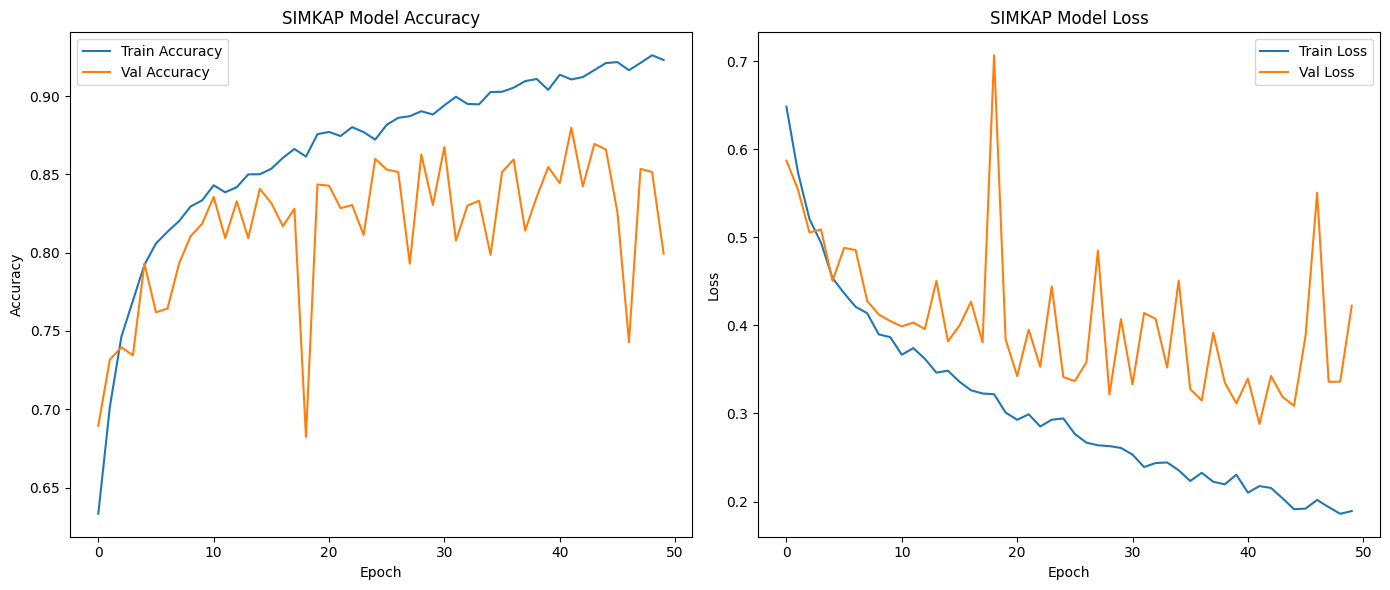

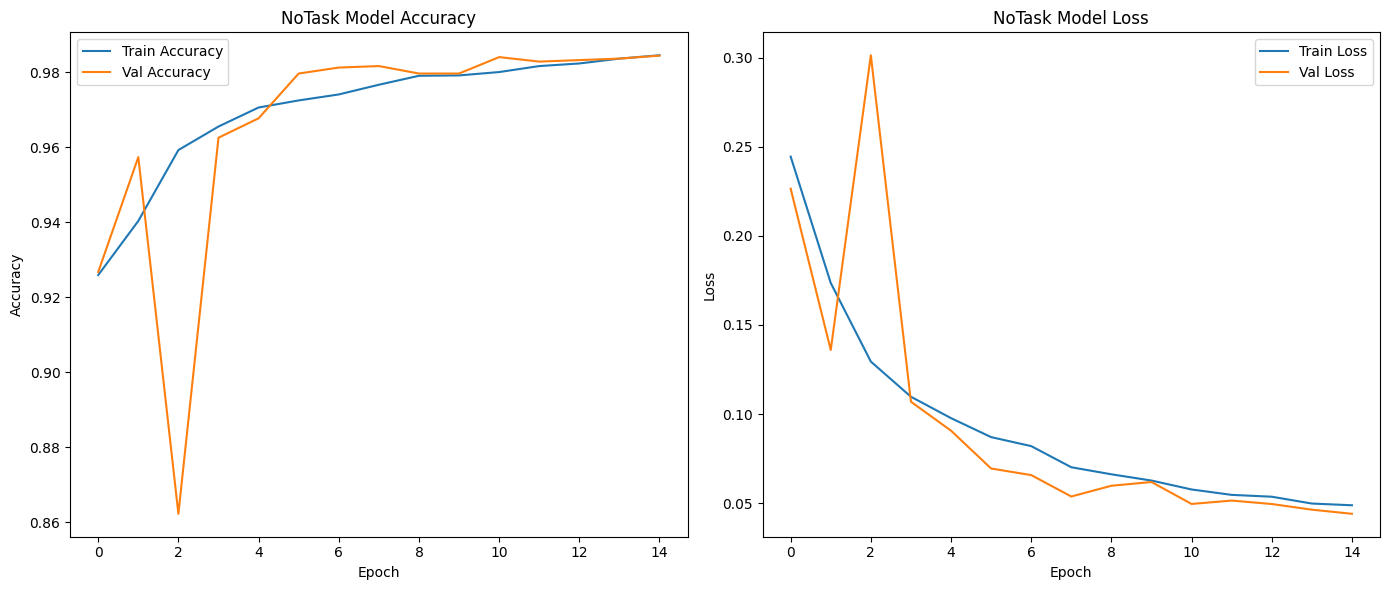

In [56]:
import matplotlib.pyplot as plt

# Plotting SIMKAP training curves
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_simkap.history['accuracy'], label='Train Accuracy')
plt.plot(history_simkap.history['val_accuracy'], label='Val Accuracy')
plt.title('SIMKAP Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_simkap.history['loss'], label='Train Loss')
plt.plot(history_simkap.history['val_loss'], label='Val Loss')
plt.title('SIMKAP Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting NoTask training curves
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_notask.history['accuracy'], label='Train Accuracy')
plt.plot(history_notask.history['val_accuracy'], label='Val Accuracy')
plt.title('NoTask Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_notask.history['loss'], label='Train Loss')
plt.plot(history_notask.history['val_loss'], label='Val Loss')
plt.title('NoTask Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
